In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"joeprickett","key":"78177a0851245dc94e3e2cb4182464d9"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
import zipfile

filename = '/content/gtsrb-german-traffic-sign.zip'

with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall('.')

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_height, img_width),
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.10), # Don't want to do too extreme rotation and want to avoid flipping
        tf.keras.layers.RandomZoom(0.15),
        tf.keras.layers.RandomHeight(0.1),
        tf.keras.layers.RandomWidth(0.1),
        tf.keras.layers.Resizing(img_height, img_width),
        tf.keras.layers.Rescaling(1./255)
    ]
)

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
  '/content/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [ ]:
val_set = tf.keras.utils.image_dataset_from_directory(
  '/content/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


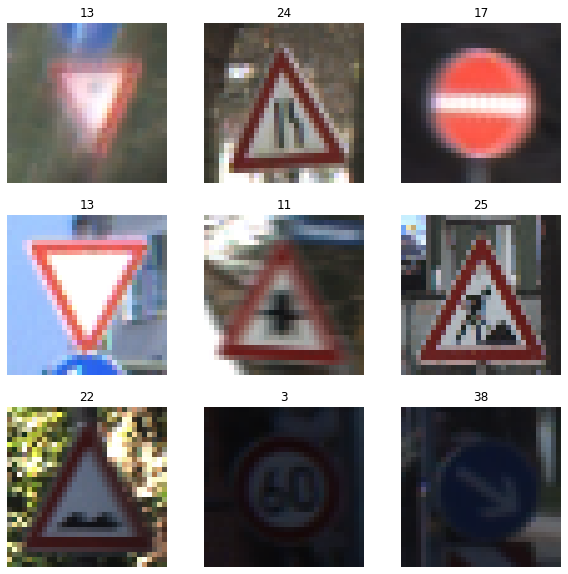

In [ ]:
import matplotlib.pyplot as plt
class_names = train_set.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 43

model = tf.keras.Sequential([
    # tf.keras.layers.Rescaling(1./255),
    # resize_and_rescale,
    data_augmentation,

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_set,
  validation_data=val_set,
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


981/981 [==============================] - 771s 777ms/step - loss: 2.2532 - accuracy: 0.3298 - val_loss: 1.0851 - val_accuracy: 0.6455
Epoch 2/50
981/981 [==============================] - 726s 740ms/step - loss: 0.8609 - accuracy: 0.7162 - val_loss: 0.2071 - val_accuracy: 0.9355
Epoch 3/50
981/981 [==============================] - 720s 734ms/step - loss: 0.3807 - accuracy: 0.8797 - val_loss: 0.1224 - val_accuracy: 0.9622
Epoch 4/50
981/981 [==============================] - 721s 736ms/step - loss: 0.2555 - accuracy: 0.9205 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 5/50
981/981 [==============================] - 766s 780ms/step - loss: 0.1946 - accuracy: 0.9422 - val_loss: 0.0361 - val_accuracy: 0.9908
Epoch 6/50
981/981 [==============================] - 724s 739ms/step - loss: 0.1646 - accuracy: 0.9511 - val_loss: 0.0413 - val_accuracy: 0.9888
Epoch 7/50
981/981 [==============================] - 707s 721ms/step - loss: 0.1489 - accuracy: 0.9559 - val_loss: 0.0273 - val_accura